<a href="https://colab.research.google.com/github/Alvaro-Garcia-Parra/AA_GRUPO3/blob/main/Lab04_Pr4PUBG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías y funciones a utilizar

In [440]:
import mlxtend
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans
from nltk.cluster.kmeans import KMeansClusterer
from scipy.spatial import distance
from nltk import cluster
from sklearn.decomposition import PCA
from scipy.cluster.vq import kmeans2

# Objetivo
Bluehole, la empresa encargada del videojuego PlayerUnknown’s Battlegrounds quiere introducir nuevos
paquetes dependiendo del tipo de jugador. Para ello dispone de estadísticas de los 200 mejores jugadores.Aplica un algoritmo de manera que se obtengan dichos grupos.

1) Utiliza varias configuraciones teniendo en cuenta el número de grupos que se creará y cambiando cómo
se mide la distancia entre individuos. Crea una tabla donde se incluya toda la información y el número
necesario de iteraciones para llegar a dicha solución. Se considera la mejor solución aquella que necesite
menos iteraciones.

2) Con la mejor configuración del punto anterior. Utiliza dos criterios para elegir el lugar inicial del
punto central de los grupos. Dibuja cómo se van modificando los grupos y cómo van cambiando
sus centroides en cada iteración. Obtén una conclusión acerca de dónde deberían situarse los
centroides.

3) Estudia qué técnicas de preprocesamiento se podrían incluir en base al error cometido en cada
cluster.

# Desarrollo
## Lectura y preprocesamiento de los datos
No hay datos vacíos ni duplicados

In [441]:
# Lectura de la base de datos
filename = 'PUBG.csv'
data = pd.read_csv(filename, sep = ',')

# Revisión de los tipos de datos
print(data.dtypes)
data

player_name             object
tracker_id               int64
solo_KillDeathRatio    float64
solo_WinRatio          float64
solo_TimeSurvived      float64
                        ...   
squad_Heals              int64
squad_Revives            int64
squad_Boosts             int64
squad_DamageDealt      float64
squad_DBNOs              int64
Length: 152, dtype: object


,player_name,tracker_id,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,...,squad_RideDistance,squad_MoveDistance,squad_AvgWalkDistance,squad_AvgRideDistance,squad_LongestKill,squad_Heals,squad_Revives,squad_Boosts,squad_DamageDealt,squad_DBNOs
0,BreakNeck,4405,3.14,17.65,18469.14,17,3,0.83,4,23.5,...,3751590.99,5194786.58,2626.97,4372.64,536.98,2186,234,1884,242132.73,1448
1,Blackwalk,8199,4.41,18.18,33014.86,33,6,0.36,11,33.3,...,4295917.30,6051783.67,2422.48,6009.73,734.85,2041,276,2340,269795.75,1724
2,mercedes_benz,4454,3.60,0.00,4330.44,5,0,0.00,1,20.0,...,3935265.63,5589608.74,1871.89,3011.87,725.44,1766,210,2193,292977.07,1897
3,DORA,7729,14.00,50.00,13421.82,8,4,0.67,6,75.0,...,2738998.00,3796916.00,2154.62,5578.41,587.28,1214,142,1252,181106.90,1057
4,n2tstar,0,10.50,33.33,9841.04,6,2,0.40,5,83.3,...,2347295.00,3220260.00,2098.47,5642.54,546.10,1245,120,923,160029.80,1077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,jungwook,11690,3.37,17.33,581263.40,427,74,0.38,195,45.7,...,585880.94,1010687.19,2015.37,2582.05,796.52,520,71,513,69526.76,456
95,Sitton,6042,6.00,27.27,15639.28,11,3,0.60,5,45.5,...,1370085.00,2075036.00,2049.28,3982.80,511.08,823,109,891,97551.31,573
96,PANDATV-TYF,22188,3.05,9.84,243659.10,193,19,0.25,77,39.9,...,1079497.60,1870113.40,1750.42,2107.95,560.26,998,166,741,135111.34,856
97,Great_Cornholio,2260,0.00,0.00,561.04,1,0,0.00,0,0.0,...,1280647.63,2002011.90,1848.11,1898.83,730.65,1088,74,573,119974.01,754


In [442]:
# No hay datos vacíos ni duplicados
data = data.drop_duplicates()
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 152 columns):
 #    Column                     Non-Null Count  Dtype  
---   ------                     --------------  -----  
 0    player_name                99 non-null     object 
 1    tracker_id                 99 non-null     int64  
 2    solo_KillDeathRatio        99 non-null     float64
 3    solo_WinRatio              99 non-null     float64
 4    solo_TimeSurvived          99 non-null     float64
 5    solo_RoundsPlayed          99 non-null     int64  
 6    solo_Wins                  99 non-null     int64  
 7    solo_WinTop10Ratio         99 non-null     float64
 8    solo_Top10s                99 non-null     int64  
 9    solo_Top10Ratio            99 non-null     float64
 10   solo_Losses                99 non-null     int64  
 11   solo_Rating                99 non-null     float64
 12   solo_BestRating            99 non-null     float64
 13   solo_DamagePg              99 non-n

<ipython-input-442-54f49d20c120>:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(verbose=True, null_counts=True)


En un principio parece que los datos se dividen en 3 grupos (solo, duo, squad). Esto lo tendremos en cuenta más adelante para ver los resultados que obtenemos y sacar conclusiones. Pero de momento no podemos sacar ninguna conclusión hasta que trabajemos con los datos.

In [443]:
# Eliminamos las dos primeras columnas ya que no nos interesan
data = data.drop(data.columns[[0, 1]], axis = 1)
data

,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,solo_Losses,solo_Rating,...,squad_RideDistance,squad_MoveDistance,squad_AvgWalkDistance,squad_AvgRideDistance,squad_LongestKill,squad_Heals,squad_Revives,squad_Boosts,squad_DamageDealt,squad_DBNOs
0,3.14,17.65,18469.14,17,3,0.83,4,23.5,14,1559.78,...,3751590.99,5194786.58,2626.97,4372.64,536.98,2186,234,1884,242132.73,1448
1,4.41,18.18,33014.86,33,6,0.36,11,33.3,27,1884.53,...,4295917.30,6051783.67,2422.48,6009.73,734.85,2041,276,2340,269795.75,1724
2,3.60,0.00,4330.44,5,0,0.00,1,20.0,5,1255.92,...,3935265.63,5589608.74,1871.89,3011.87,725.44,1766,210,2193,292977.07,1897
3,14.00,50.00,13421.82,8,4,0.67,6,75.0,4,1798.70,...,2738998.00,3796916.00,2154.62,5578.41,587.28,1214,142,1252,181106.90,1057
4,10.50,33.33,9841.04,6,2,0.40,5,83.3,4,1668.67,...,2347295.00,3220260.00,2098.47,5642.54,546.10,1245,120,923,160029.80,1077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,3.37,17.33,581263.40,427,74,0.38,195,45.7,353,2952.00,...,585880.94,1010687.19,2015.37,2582.05,796.52,520,71,513,69526.76,456
95,6.00,27.27,15639.28,11,3,0.60,5,45.5,8,1754.57,...,1370085.00,2075036.00,2049.28,3982.80,511.08,823,109,891,97551.31,573
96,3.05,9.84,243659.10,193,19,0.25,77,39.9,174,2624.78,...,1079497.60,1870113.40,1750.42,2107.95,560.26,998,166,741,135111.34,856
97,0.00,0.00,561.04,1,0,0.00,0,0.0,1,1201.09,...,1280647.63,2002011.90,1848.11,1898.83,730.65,1088,74,573,119974.01,754


Debido a que tenemos muchas variables, 150 más en concreto, nos vemos obligados a reducirlas para poder representarlas de alguna forma. Por ello, utilizamos PCA y reducimos la dimensionalidad hasta 3 componentes para poder representar los datos en 3-D, esto implica que haya perdida de información de por medio así que tendremos que tenerlo en cuenta.

In [444]:
# Creamos un objeto PCA con 2 componentes
pca = PCA(n_components=3)

# Aplicamos PCA a los datos
data_pca = pca.fit_transform(data)

Text(0.5, 0, 'z')

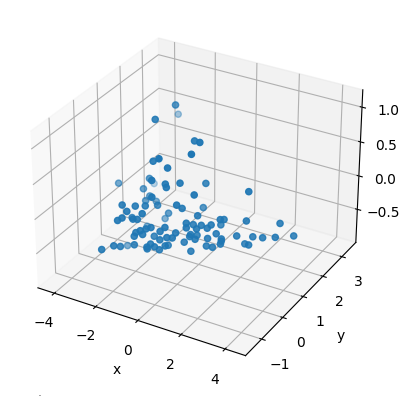

In [445]:
# Crear el eje 3D
ax = plt.axes(projection = '3d')

# Graficar la superficie
ax.scatter3D(data_pca[:,0], data_pca[:,1], data_pca[:,2])

# Etiquetas de los ejes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

## Elegimos la k y distancia más optima
En este código realizamos el método de clustering "KMeansClusterer", de la librería nltk. Hemos decidido utilizar este método ya que es el único que hemos encontrado de forma que nos permita cambiar la distancia, tal y como nos pide el ejercicio.

In [446]:
# Número de clusters
n_clusters = [2,3,4,5]

# Distancias
metric = [distance.euclidean, distance.minkowski, distance.cosine]

# Bucle probando con distintas distancias y distintos k's
# Nos quedamos con el que menos iteraciones haga
for n in n_clusters:
  for m in metric:
    print(f"Cluster: {n} \n Distance: {m}")
    kmeans = KMeansClusterer(n, distance = m)
    kmeans = kmeans.cluster(data_pca, assign_clusters= True, trace= True)

Cluster: 2 
 Distance: <function euclidean at 0x7fc870cb1480>
k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
Cluster: 2 
 Distance: <function minkowski at 0x7fc870cb13f0>
k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
Cluster: 2 
 Distance: <function cosine at 0x7fc870cb1630>
k-means trial 0
iteration
iteration
iteration
iteration
Cluster: 3 
 Distance: <function euclidean at 0x7fc870cb1480>
k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
Cluster: 3 
 Distance: <function minkowski at 0x7fc870cb13f0>
k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
Cluster: 3 
 Distance: <function cosine at 0x7fc870cb1630>
k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
Cluster: 4 
 Distance: <function euclidean at 0x7fc870cb1480>
k-means trial 0
iteration


Una vez realizado esto, observamos que el método que menos iteraciones realiza en general es con la distancia "cosine". A pesar de esto, en nuestra opinión es mejor la distancia euclidea y vamos a ver cuántos clusteres son los más óptimos para nuestro modelo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

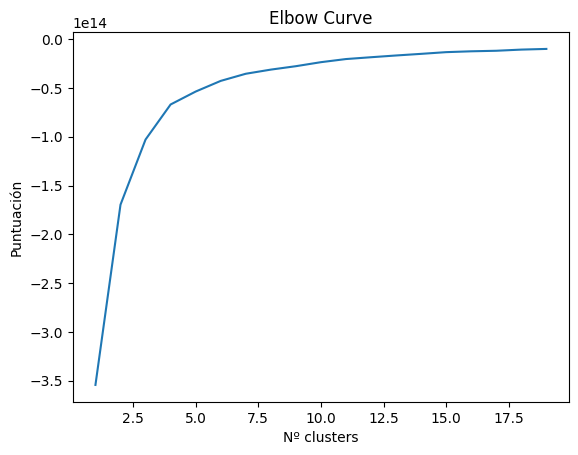

In [447]:
n_clusters = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in n_clusters]
kmeans
score = [kmeans[i].fit(data_pca).score(data_pca) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Nº clusters')
plt.ylabel('Puntuación')
plt.title('Elbow Curve')
plt.show()

Por lo mencionado anteriormente y viendo esta gráfica lo más óptimo sería elegir un modelo que utilice 3/4 clusteres. Por esto, vamos a coger mejor la distancia euclidea con 3 clusteres aunque hagamos más iteraciones, ya que pensamos que el modelo va a ser mejor.

A continuación, realizamos otra vez el clustering pero en base a una inicialización previa de los centroides. Solo tenemos dos opciones, se asignan de forma aleatoria o se asignan lo más lejano posible unas de otras. Esta segunda opción es la mejor ya que como hemos visto en clase, puede que si los centroides se inicialicen de forma aleatoria luego no queden de la forma más óptima.

### Centroides aleatorios
Como hemos elegido la distancia euclidea podemos usar el método kmeans de la librería sklearn, e inicializar los centroides como random.

Como los datos que tenemos son en tres dimensiones, no se puede observar muy claramente las divisiones de los grupos, por esto mismo decidimos gráficar en 2-D, tanto XY como YZ y XZ, para poder verlo mejor.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


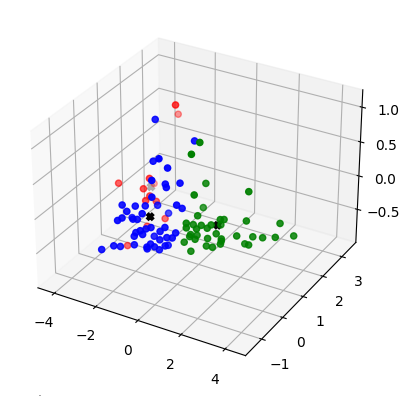

In [448]:
# Centroides aleatorios
# Calculamos los clusteres
n_clusters = 3
kmeans = KMeans(n_clusters, init = 'random', random_state=42).fit(data_pca)

# Obtenemos los centroides e iteraciones
centroides = kmeans.cluster_centers_
iters_random = kmeans.n_iter_

# Etiquetamos los individuos
labels = kmeans.predict(data_pca)

# Colores que vamos a usar para los clusteres
colors = ['red', 'green', 'blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])

# Graficamos los datos, en función del cluster al que pertenezcan, y los centroides
ax = plt.axes(projection = '3d')

# Graficar la superficie
ax.scatter3D(data_pca[:,0], data_pca[:,1], data_pca[:,2], c = asignar)
ax.scatter3D(centroides[:,0], centroides[:,1], centroides[:,2], marker='x', linewidths=3, color ='black')

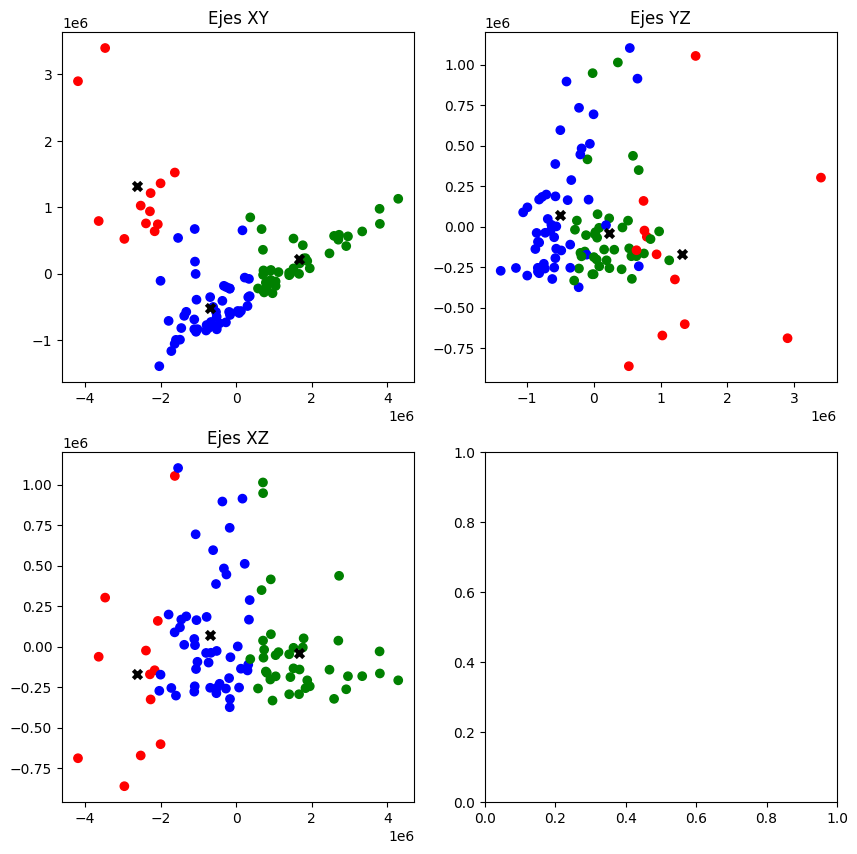

In [449]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

# Ejex XY 
ax[0,0].title.set_text("Ejes XY")
ax[0,0].scatter(data_pca[:,0], data_pca[:,1], c = asignar)
ax[0,0].scatter(centroides[:,0], centroides[:,1], marker = 'x', linewidths=3, color = 'black')

# Ejex YZ
ax[0,1].title.set_text("Ejes YZ")
ax[0,1].scatter(data_pca[:,1], data_pca[:,2], c = asignar)
ax[0,1].scatter(centroides[:,1], centroides[:,2], marker = 'x', linewidths=3, color = 'black')

# Ejex XZ
ax[1,0].title.set_text("Ejes XZ")
ax[1,0].scatter(data_pca[:,0], data_pca[:,2], c = asignar)
ax[1,0].scatter(centroides[:,0], centroides[:,2], marker = 'x', linewidths=3, color = 'black')

Vemos que aún así no vemos una división clara de los clusteres, unicamente en los ejes XY, más adelante veremos como van recalculando los centroides y los clusteres según avanzan las iteraciones.

### Centroides basados en la distancia
Como hemos dicho, cuando termina el algoritmo quiere decir que al recalcular el centroide en una iteración me devuelve a dar el mismo que en la anterior iteración, y, por ende, el mismo cluster. Esto quiere decir que no se puede minimizar más el error, sin embargo; esto no tiene por qué ser la mejor respuesta posible, nos quedamos estancados en un mínimo local. Para llegar a un mínimo global, es más probable si inicializamos los centroides como 'k-means++', nos ayuda a que converja más rápido, además de que la solución sea más consistente, ya que, a diferencia de la inicialización aleatoria, los centroides se inicializan de manera más inteligente.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


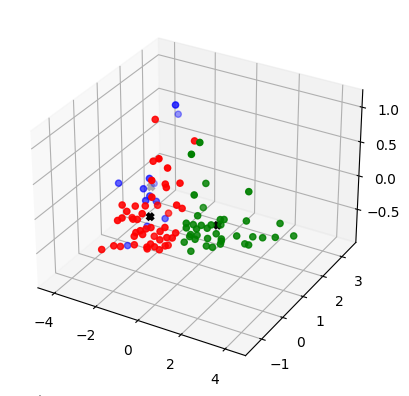

In [450]:
# Centroides basados en la distancia
# Calculamos los clusteres
kmeans = KMeans(n_clusters, init = 'k-means++', random_state= 42).fit(data_pca)

# Obtenemos los centroides e iteraciones
centroides = kmeans.cluster_centers_
iters = kmeans.n_iter_

# Etiquetamos los individuos
labels = kmeans.predict(data_pca)

# Colores que vamos a usar para los clusteres
colors = ['red', 'green', 'blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])

# Graficamos los datos, en función del cluster al que pertenezcan, y los centroides
ax = plt.axes(projection = '3d')

# Graficar la superficie
ax.scatter3D(data_pca[:,0], data_pca[:,1], data_pca[:,2], c = asignar)
ax.scatter3D(centroides[:,0], centroides[:,1], centroides[:,2], marker='x', linewidths=3, color ='black')

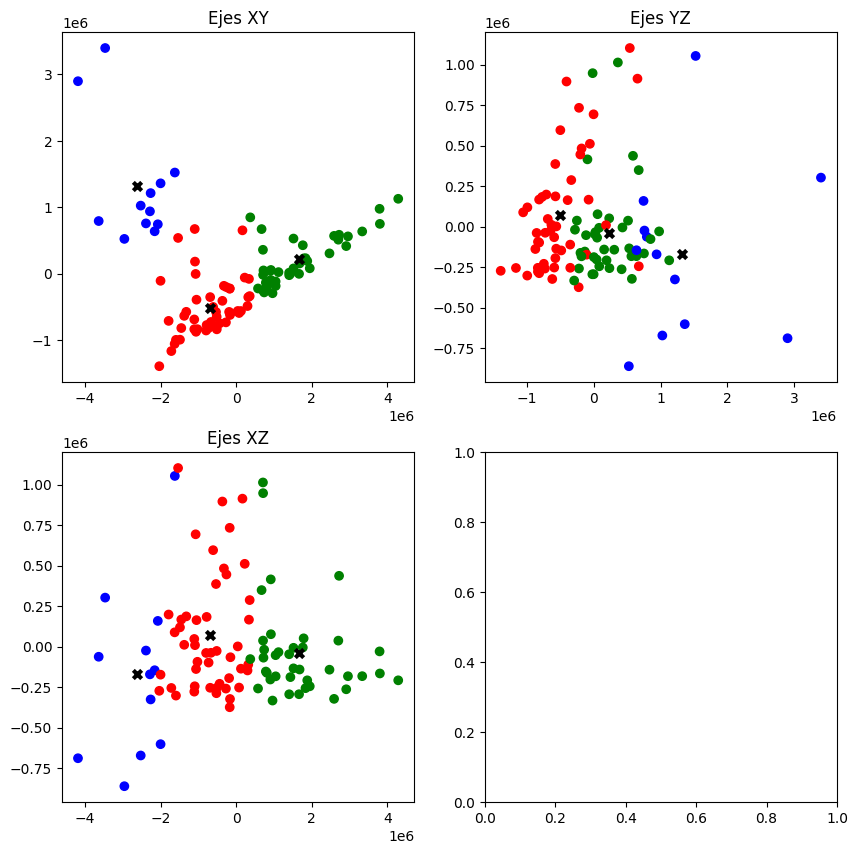

In [451]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

# Ejex XY 
ax[0,0].title.set_text("Ejes XY")
ax[0,0].scatter(data_pca[:,0], data_pca[:,1], c = asignar)
ax[0,0].scatter(centroides[:,0], centroides[:,1], marker = 'x', linewidths=3, color = 'black')

# Ejex YZ
ax[0,1].title.set_text("Ejes YZ")
ax[0,1].scatter(data_pca[:,1], data_pca[:,2], c = asignar)
ax[0,1].scatter(centroides[:,1], centroides[:,2], marker = 'x', linewidths=3, color = 'black')

# Ejex XZ
ax[1,0].title.set_text("Ejes XZ")
ax[1,0].scatter(data_pca[:,0], data_pca[:,2], c = asignar)
ax[1,0].scatter(centroides[:,0], centroides[:,2], marker = 'x', linewidths=3, color = 'black')

A pesar de haber inicializado los centroides de una mejor forma, obtenemos el mismo resultado perob realizando menos iteraciones. Ahora como nos pide el apartado del ejercicio, vamos a ir dibujando todas las iteraciones para ver como van cambiando los centroides y se van formando los clusteres. Como la gráfica 3D no es muy visual, mejor graficamos los ejes XY que es donde mejor se obseva.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

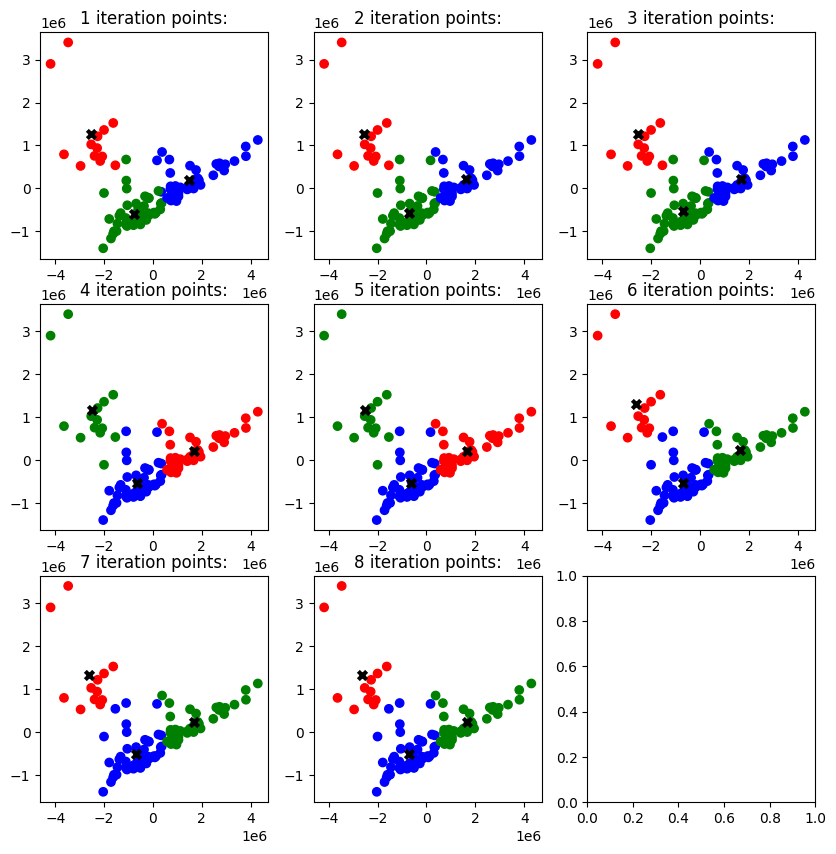

In [452]:
# Graficamos las iteraciones
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(10,10))
c=d=0
for i in range(iters_random):
    ax[c,d].title.set_text(f"{i+1} iteration points:")
    kmeans = KMeans(n_clusters, init = 'random', max_iter=i+1, random_state=42)
    kmeans.fit(data_pca)
    centroids = kmeans.cluster_centers_
    labels = kmeans.predict(data_pca)

    asignar=[]
    for row in labels:
      asignar.append(colores[row])

    ax[c,d].scatter(data_pca[:,0],data_pca[:,1],c=asignar)
    ax[c,d].scatter(centroids[:, 0], centroids[:, 1], marker = 'x', linewidths=3, c='black')
    d+=1
    if d==3:
        c+=1
        d=0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


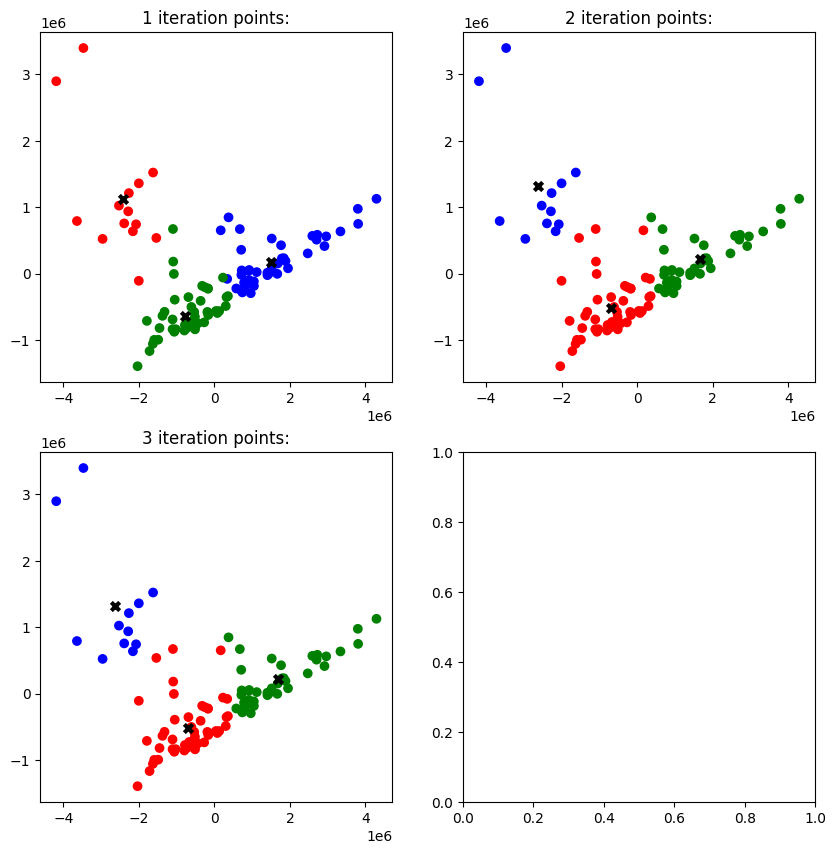

In [453]:
# Graficamos las iteraciones
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
c=d=0
for i in range(iters):
    ax[c,d].title.set_text(f"{i+1} iteration points:")
    kmeans = KMeans(n_clusters, init = 'k-means++', max_iter=i+1, random_state = 42)
    kmeans.fit(data_pca)
    centroids = kmeans.cluster_centers_
    labels = kmeans.predict(data_pca)
    
    asignar=[]
    for row in labels:
      asignar.append(colores[row])

    ax[c,d].scatter(data_pca[:,0],data_pca[:,1],c=asignar)
    ax[c,d].scatter(centroids[:, 0], centroids[:, 1], marker = 'x', linewidths=3, c='black')
    d+=1
    if d==2:
        c+=1
        d=0

Vemos que cuando no inicializamos los centroides hemos necesitado un total de 8 iteraciones, mientras que cuando los inicializamos solo hemos necesitado 3. Por lo tanto, aquí podemos sacar la conclusión de aunque nos ofrezcan el mismo resultado es mucho más eficiente el segundo.

# Conclusiones y mejoras
Como hemos cogido 3 clusteres, lo más seguro es que clasifique los individuos según sean mejores en modo solo, en duo o en squad. Aún así al representar los datos, además de que parece que hay algún que otro outlier, la mayoría estan bastante juntos y no se ve una división clara de los clusteres.

Con esto podemos concluir que los jugadores son bastante parecidos en todos los modos de juego, al fin y al cabo son jugadores profesionales y sus estadísticas serán bastante parecidas, por lo tanto es algo complicado conseguir una división clara de estos.

Técnicas de preprocesamiento para mejorar el modelo de clustering:

- Normalización de los datos: Si los datos estan en diferentes rangos o escalas, nos puede ayudar a minimizar el error y a que converja antes nuestro modelo.
- Eliminación/modificación de outliers: En caso de que haya valores anómalos/atípicos, podemos eliminarlos o tratarlos de otra manera ya que afectan a la hora de hacer los clusteres.
- Selección de variables: Podemos ver cuales son las variables menos importantes y que no influyan en la formación de los clusteres, de tal manera que podríamos eliminarlas.
- Reducción de dimensionalidad: Como hemos hecho en este caso, si tenemos muchas variables nos puede ayudar a reducir el error aunque también podemos perder información.
